# IT - 507 Advanced Image Processing Assignment - 5
## Group - Kishan Vaishnani(202011004) and Dhyanil Mehta(202011032)

In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import *

## 1) Find out and show the Magnitude and Phase information of the cameraman image (Fig.1). Perform log transformation on the magnitude spectrum and show the result. Discuss the reason of difference between the observations (with log and without log transformation). Observe the significance of DFT coefficients of the image by reconstructing the image with higher frequency coefficients and lower frequency coefficients, separately without changing the phase information.
*[Tips:Use FFT for finding out the DFT coefficients.]*

![cameraman.jpg](cameraman.jpg "cameraman.jpg")
## &emsp;&emsp;&emsp;&emsp;&emsp;Fig.1

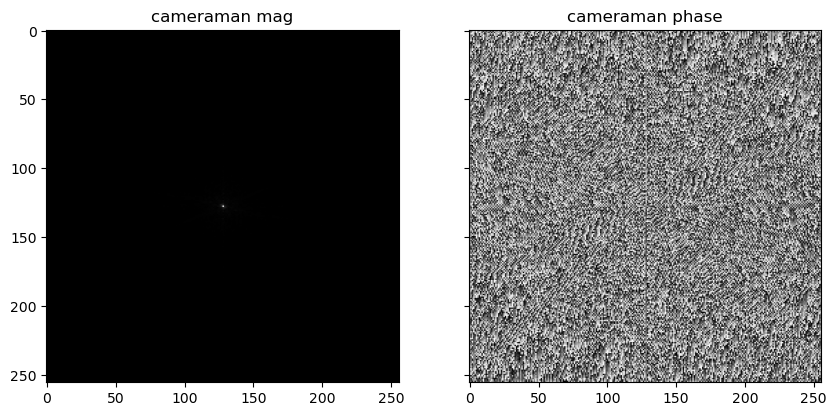

In [0]:
c_man = cv2.imread("cameraman.jpg", 0)

c_man_fft = fft2(c_man / 255.0)
c_man_fft = fftshift(c_man_fft)
c_man_mag = np.abs(c_man_fft)
c_man_phase = np.angle(c_man_fft)

plt.imshow(c_man, cmap='gray')
plt.title("cameraman")
plt.show()

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10, 10))

ax[0].imshow(c_man_mag, cmap='gray')
ax[0].set_title("cameraman mag")

ax[1].imshow(c_man_phase, cmap='gray')
ax[1].set_title("cameraman phase")

plt.savefig("cameraman_magnitude_phase.png")
plt.show()

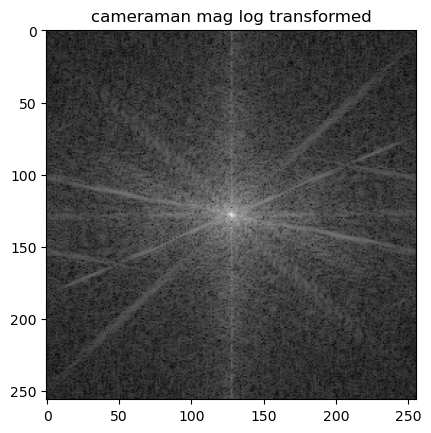

In [0]:
c = 255 / np.log(1 + np.max(c_man_mag))
c_man_mag_log = c * (np.log(c_man_mag + 1))
c_man_mag_log = np.array(c_man_mag_log, dtype = np.uint8)

plt.imshow(c_man_mag_log, cmap='gray')
plt.title("cameraman mag log transformed")
plt.savefig("cameraman_magnitude_logtransform.png")

Maximums frequency coeff:  30497.32941176471
Minimum frequency coeff:  0.02924972215055077
Mean frequency coeff:  19.298234050103098
Std. Dev. frequency coeff:  133.18203971240027


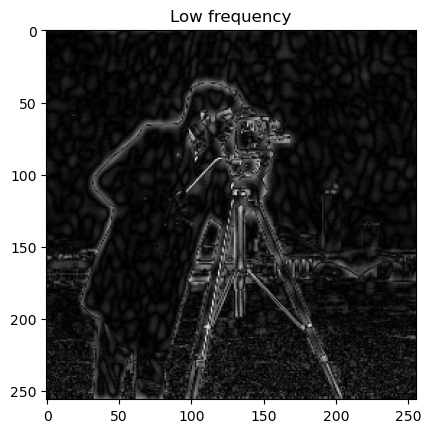

In [0]:
print("Maximums frequency coeff: ",np.max(c_man_mag))
print("Minimum frequency coeff: ",np.min(c_man_mag))
print("Mean frequency coeff: ",np.mean(c_man_mag))
print("Std. Dev. frequency coeff: ",np.std(c_man_mag))

c_man_high_freqs = c_man_mag.copy()
c_man_low_freqs = c_man_mag.copy()

c_man_high_freqs[c_man_high_freqs < 160] = 0
c_man_low_freqs[c_man_low_freqs >= 160] = 0

combined_high = np.multiply(c_man_high_freqs, np.exp(1j * c_man_phase))
c_man_combined_high = np.abs(np.real(ifft2(combined_high)))
plt.title("High frequency")
plt.imshow(c_man_combined_high, cmap='gray')
plt.savefig("cameraman_high_freq.png")

plt.figure()
combined_low = np.multiply(c_man_low_freqs, np.exp(1j * c_man_phase))
c_man_combined_low = np.abs(np.real(ifft2(combined_low)))
plt.title("Low frequency")
plt.imshow(c_man_combined_low, cmap='gray')
plt.savefig("cameraman_low_freq.png")

## 2) Demonstrate the significance of magnitude and phase information by reconstructing an image with the magnitude of Fig.2(a) and phase of Fig. 2(b). Repeat the experiment with the magnitude of Fig.2 (b) and phase of Fig.2 (a).
*[Tips: First of all resize the images to create same dimensional images]*
<center>
<table>
<tr>
<td> <img src="einstein.jpg" width=auto height=200 /><br> <center>Fig.2(a)</center></td>
<td> <img src="lena_face.jpg" width=auto height=200 /><br> <center>Fig.2(b)</center></td>
</tr>
</table>
</center>

In [0]:
def plot_img_fourier(img, magnitude, phase, name):
    c = 255 / np.log(1 + np.max(magnitude))
    mag_log = c * (np.log(magnitude + 1))
    mag_log = np.array(mag_log, dtype = np.uint8)

    fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10, 10))
    fig.suptitle(f"{name} plots")

    ax[0, 0].imshow(img, cmap='gray')
    ax[0, 0].set_title(f"{name}")

    ax[0, 1].imshow(phase, cmap='gray')
    ax[0, 1].set_title(f"{name} phase")

    ax[1, 0].imshow(magnitude, cmap='gray')
    ax[1, 0].set_title(f"{name} magnitude")

    ax[1, 1].imshow(mag_log, cmap='gray')
    ax[1, 1].set_title(f"{name} magnitude log transformed")

    plt.savefig(f"{name}_phase_magnitude_with_logtransform.png")
    plt.show()

(256, 256)


(256, 256)


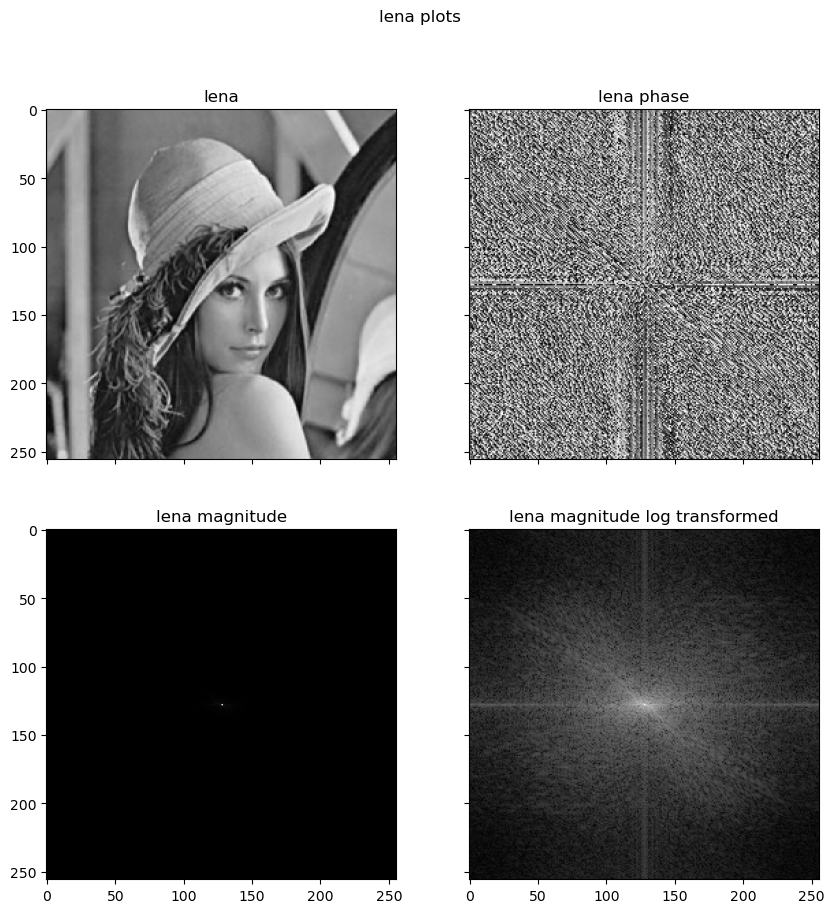

In [0]:
einstein = cv2.imread("einstein.jpg", 0)
einstein = cv2.resize(einstein, (256,256))
einstein_fft = fft2(einstein / 255.0)
einstein_fft = fftshift(einstein_fft)
einstein_mag = np.abs(einstein_fft)
einstein_phase = np.angle(einstein_fft)
print(einstein.shape)

plot_img_fourier(einstein, einstein_mag, einstein_phase, "einstein")
print("\n")

lena = cv2.imread("lena_face.jpg", 0)
lena = cv2.resize(lena, (256,256))
lena_fft = fft2(lena / 255.0)
lena_fft = fftshift(lena_fft)
lena_mag = np.abs(lena_fft)
lena_phase = np.angle(lena_fft)
print(lena.shape)

plot_img_fourier(lena, lena_mag, lena_phase, "lena")

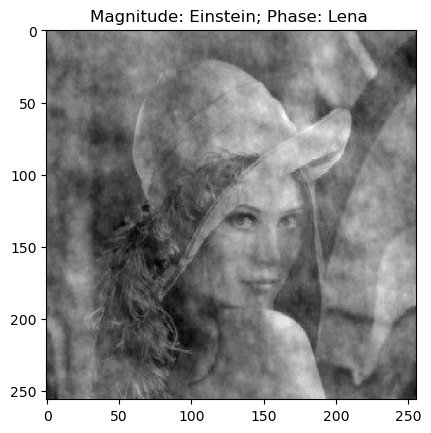

In [0]:
combined_lena_einstein = np.multiply(lena_mag, np.exp(1j * einstein_phase))
combined_lena_einstein = np.abs(np.real(ifft2(combined_lena_einstein)))
plt.title("Magnitude: Lena; Phase: Einstein")
plt.imshow(combined_lena_einstein, cmap='gray')
plt.savefig("lena_mag_einstein_phase.png")
plt.figure()

combined_einstein_lena = np.multiply(einstein_mag, np.exp(1j * lena_phase))
combined_einstein_lena = np.abs(np.real(ifft2(combined_einstein_lena)))
plt.title("Magnitude: Einstein; Phase: Lena ")
plt.imshow(combined_einstein_lena, cmap='gray')
plt.savefig("einstein_mag_lena_phase.png")

## 3) Implement low pass and high pass filters in frequency domain for Ideal, Butterworth (order 2), and Gaussian kernels and apply those on Fig.1. Discuss about the results.
<center>
<img src="cameraman.jpg" width=256 height=256>
<br>
<h3>Fig.1</h3>
</center>

In [0]:
def create_highpass_filter(shape, center, radius, f_type=2, n=2):
    rows, cols = shape[:2]
    r, c = np.mgrid[0:rows:1, 0:cols:1]
    c -= center[0]
    r -= center[1]
    d = np.power(c, 2.0) + np.power(r, 2.0)
    hp_filter_mat = np.zeros(shape, np.float32)
    
    if f_type == 0:  # Ideal Highpass filter
        hp_filter = np.copy(d)
        hp_filter[hp_filter < pow(radius, 2.0)] = 0
        hp_filter[hp_filter >= pow(radius, 2.0)] = 1
    elif f_type == 1: # Butterworth Highpass filter
        hp_filter = 1.0 - 1.0 / (1 + np.power(np.sqrt(d) / radius, 2*n))
    elif f_type == 2: # Gaussian Highpass filter
        hp_filter = 1.0 - np.exp(- d / (2 * pow(radius, 2.0)))
    else:
        raise ValueError("Choose type from 0, 1, and 2.")
    
    hp_filter_mat[:, :] = hp_filter
    return hp_filter_mat

def create_lowpass_filter(shape, center, radius, f_type=2, n=2):
    rows, cols = shape[:2]
    r, c = np.mgrid[0:rows:1, 0:cols:1]
    c -= center[0]
    r -= center[1]
    d = np.power(c, 2.0) + np.power(r, 2.0)
    lp_filter_mat = np.zeros(shape, np.float32)
    
    if f_type == 0:  # Ideal Highpass filter
        lp_filter = np.copy(d)
        lp_filter[lp_filter < pow(radius, 2.0)] = 1
        lp_filter[lp_filter >= pow(radius, 2.0)] = 0
    elif f_type == 1: # Butterworth Highpass filter
        lp_filter = 1.0 / (1 + np.power(np.sqrt(d) / radius, 2*n))
    elif f_type == 2: # Gaussian Highpass filter
        lp_filter = np.exp(- d / (2 * pow(radius, 2.0)))
    else:
        raise ValueError("Choose type from 0, 1, and 2.")
    
    lp_filter_mat[:, :] = lp_filter
    return lp_filter_mat

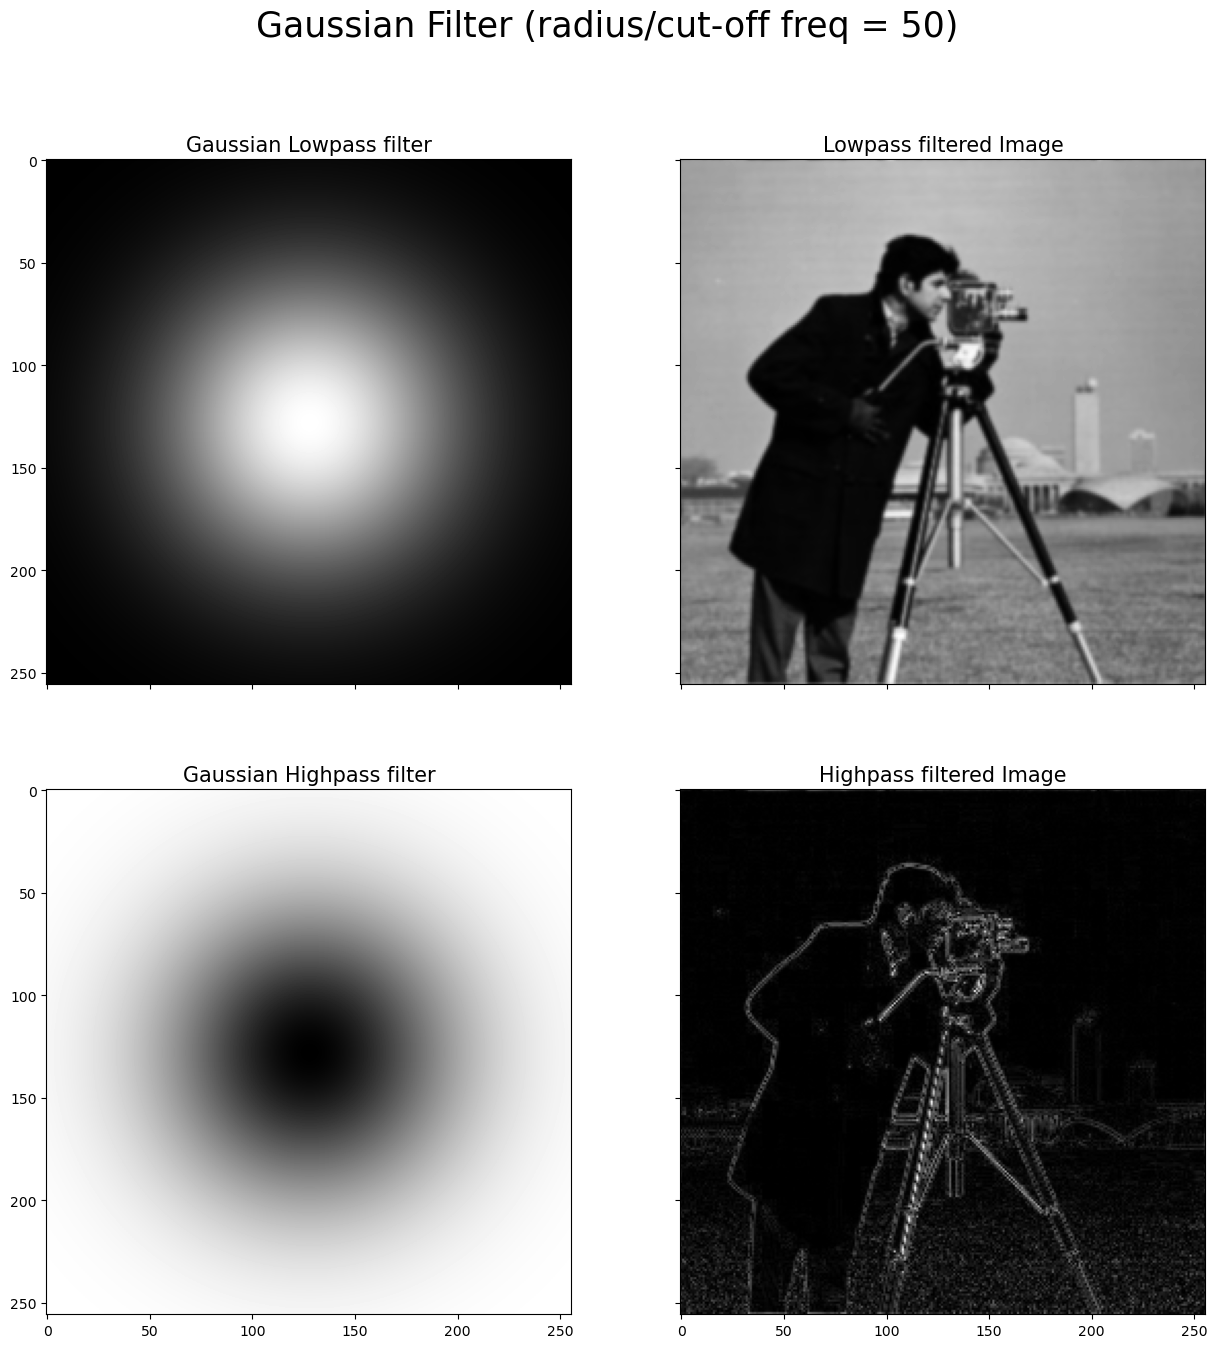

In [0]:
c_man = cv2.imread("cameraman.jpg", 0)
c_man_fft = fft2(c_man / 255.0)
c_man_fft = fftshift(c_man_fft)
c_man_mag = np.abs(c_man_fft)
minValue, maxValue, minLoc, maxLoc = cv2.minMaxLoc(c_man_mag)  # The maximum value of the spectrum after centralization is at the center of the image

radius = 50

for i, name in enumerate(["Ideal", "Butterworth", "Gaussian"]):
    lowpass_filter = create_lowpass_filter(c_man_fft.shape, maxLoc, radius, i)
    highpass_filter = create_highpass_filter(c_man_fft.shape, maxLoc, radius, i)

    low_filtered_img_fft = c_man_fft * lowpass_filter
    reconstructed_low_img = np.abs(np.real(ifft2(low_filtered_img_fft)))

    high_filtered_img_fft = c_man_fft * highpass_filter
    reconstructed_high_img = np.abs(np.real(ifft2(high_filtered_img_fft)))
    
    # plt.figure()
    fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(15, 15))
    
    if i == 1:
        fig.suptitle(f"{name} Filter (radius/cut-off freq = {radius}, order = 2)", fontsize=25)
    else:
        fig.suptitle(f"{name} Filter (radius/cut-off freq = {radius})", fontsize=25)
    
    ax[0, 0].set_title(f"{name} Lowpass filter", size=15)
    ax[0, 0].imshow(lowpass_filter, cmap='gray')

    ax[0, 1].set_title("Lowpass filtered Image", size=15)
    ax[0, 1].imshow(reconstructed_low_img, cmap='gray')

    ax[1, 0].set_title(f"{name} Highpass filter", size=15)
    ax[1, 0].imshow(highpass_filter, cmap='gray')

    ax[1, 1].set_title("Highpass filtered Image", size=15)
    ax[1, 1].imshow(reconstructed_high_img, cmap='gray')

    plt.savefig(f"cameraman_{name}_frequency_filtering.png")

## (4) Consider the image of Fig.1, and implement unsharp masking and highboost filtering in frequency domain. Compare the results with the implementation of spatial domain operation. Tune the parameters (cut-off frequency for frequency domain, kernel size for spatial domain, etc.) to achieve the same results in both domains. Report the results.
<center>
<img src="cameraman.jpg" width=256 height=256>
<br>
<h3>Fig.1</h3>
</center>

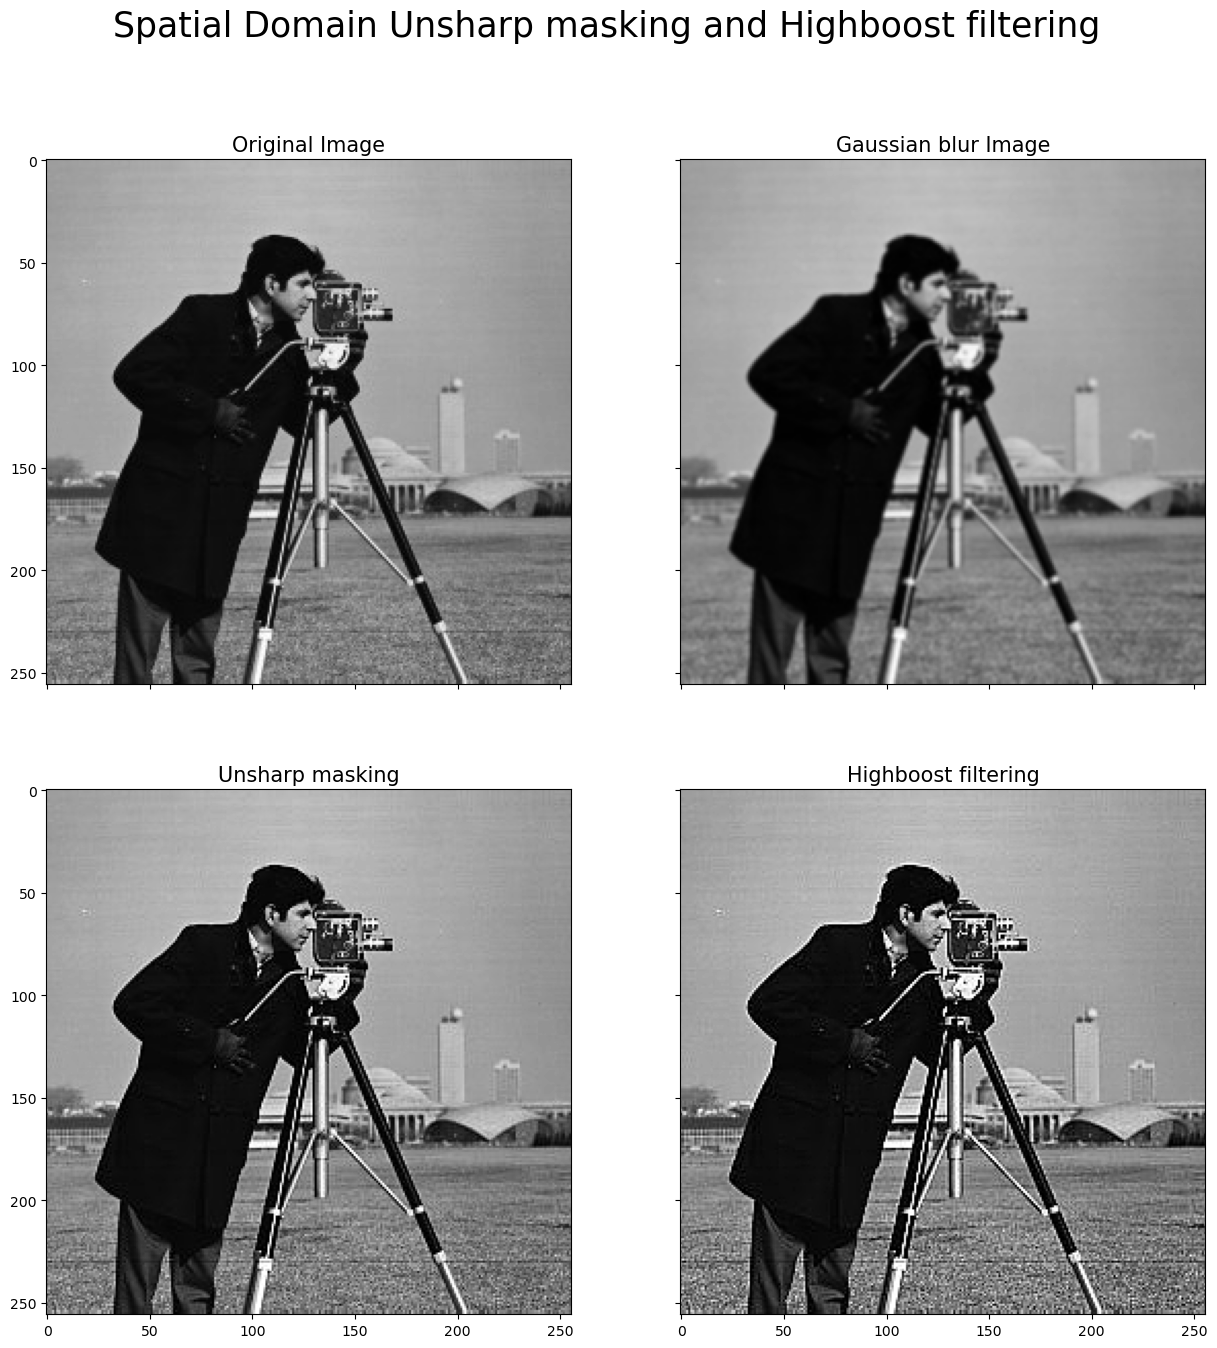

In [0]:
# Spatial domain unsharp masking and highboost filtering
gauss_mask = cv2.GaussianBlur(c_man, (3, 3), 0.0)
# g_mask = c_man - gauss_mask

# c_man_sharp = c_man + g_mask
# c_man_hbf = c_man + 2 * g_mask

c_man_sharp = cv2.addWeighted(c_man, 2, gauss_mask, -1, 0)
c_man_hbf = cv2.addWeighted(c_man, 3, gauss_mask, -2, 0)

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(15, 15))
fig.suptitle("Spatial Domain Unsharp masking and Highboost filtering", fontsize=25)

ax[0, 0].imshow(c_man, cmap='gray')
ax[0, 0].set_title("Original Image", size=15)

ax[0, 1].imshow(gauss_mask, cmap='gray')
ax[0, 1].set_title("Gaussian blur Image", size=15)

ax[1, 0].imshow(c_man_sharp, cmap='gray')
ax[1, 0].set_title("Unsharp masking", size=15)

ax[1, 1].imshow(c_man_hbf, cmap='gray')
ax[1, 1].set_title("Highboost filtering", size=15)

plt.savefig("cameraman_unsharp_highboost_spatial_filtering.png")

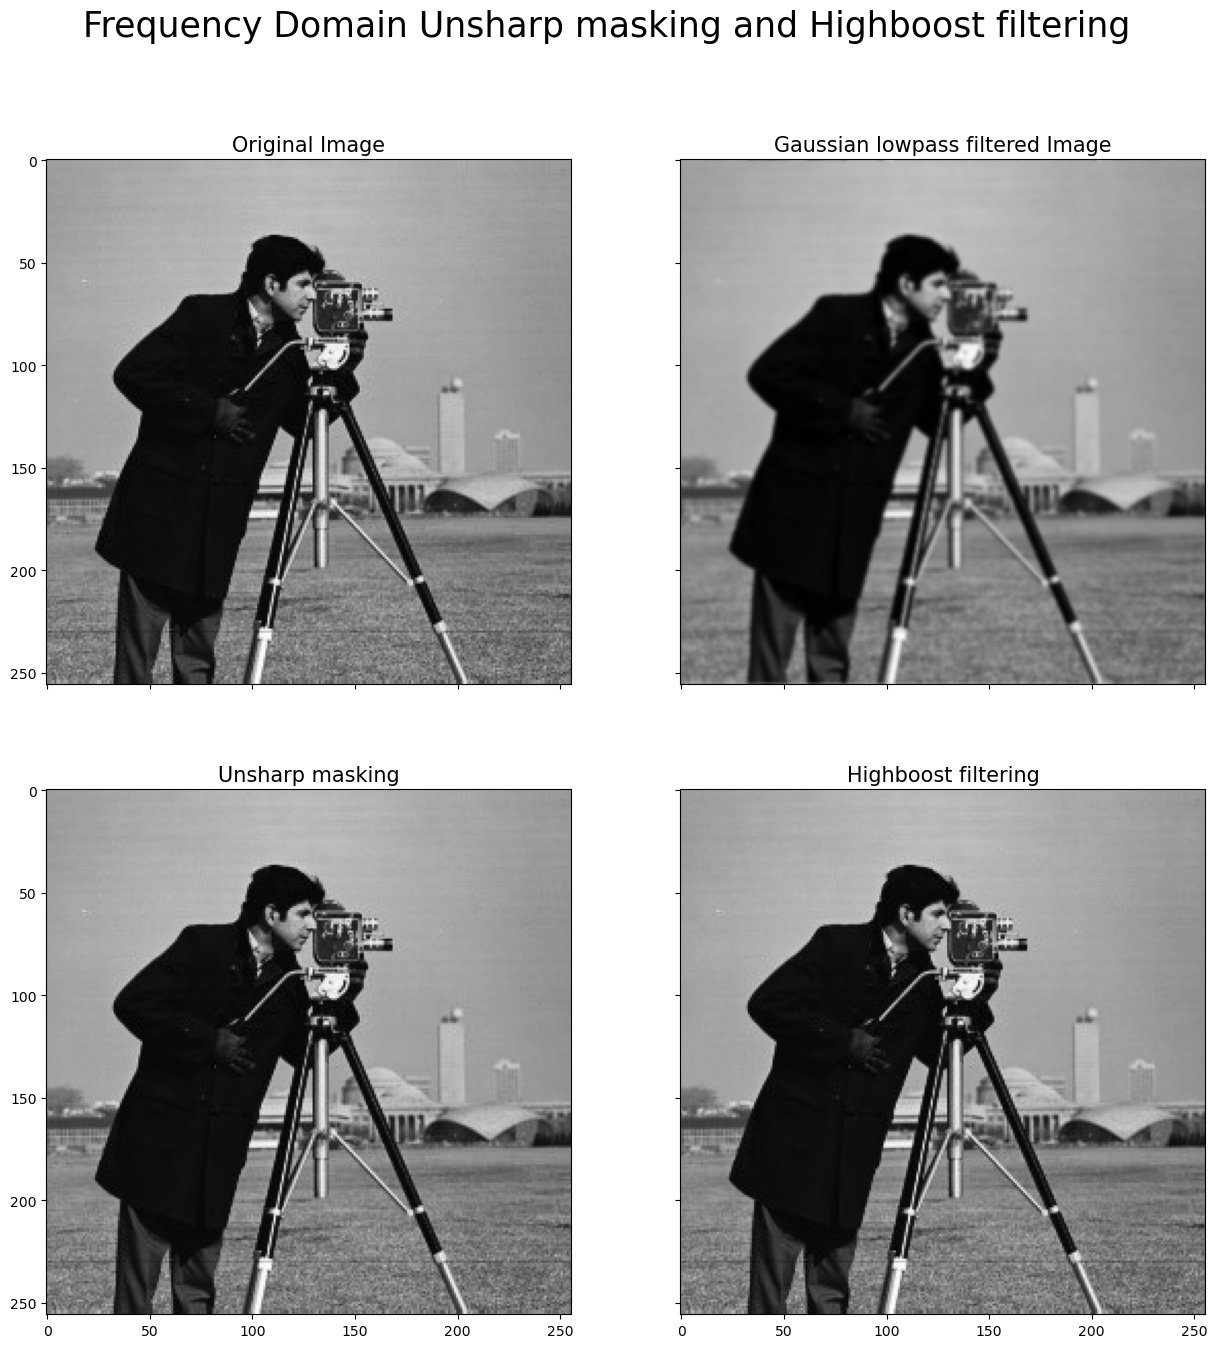

In [0]:
radius = 50
gaussian_lowpass_filter = create_lowpass_filter(c_man_fft.shape, maxLoc, radius, 2)
filtered_img_fft = c_man_fft * gaussian_lowpass_filter
reconstructed_img = np.abs(np.real(ifft2(filtered_img_fft)))

c_man_sharp_freq = cv2.addWeighted(c_man, 2, reconstructed_img, -1, 0, dtype=cv2.CV_64F)
c_man_hbf_freq = cv2.addWeighted(c_man, 3, reconstructed_img, -2, 0, dtype=cv2.CV_64F)

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(15, 15))
fig.suptitle("Frequency Domain Unsharp masking and Highboost filtering", fontsize=25)

ax[0, 0].imshow(c_man, cmap='gray')
ax[0, 0].set_title("Original Image", size=15)

ax[0, 1].imshow(reconstructed_img, cmap='gray')
ax[0, 1].set_title("Gaussian lowpass filtered Image", size=15)

ax[1, 0].imshow(c_man_sharp_freq, cmap='gray')
ax[1, 0].set_title("Unsharp masking", size=15)

ax[1, 1].imshow(c_man_hbf_freq, cmap='gray')
ax[1, 1].set_title("Highboost filtering", size=15)

plt.savefig("cameraman_unsharp_highboost_frequency_filtering.png")